In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

if (path := "C:\\Program Files\\Graphviz\\bin") not in os.environ['PATH']:
    os.environ['PATH'] = f"{os.environ['PATH']};{path}"
if (path := 'C:/dev/projects/allocation') not in sys.path:
    sys.path.append(path)

import ipywidgets as w
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf
from dask.distributed import Client
from graphviz import Source
from matplotlib import pyplot as plt
from pandas.tseries.offsets import DateOffset
from scipy.cluster.hierarchy import dendrogram
from scipy import stats
from sklearn.tree import plot_tree, export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from IPython.display import display
from dask.distributed import Client
pd.options.plotting.backend = "plotly"
sklearn.set_config(display='diagram')


from allocation import *
from allocation.strategies import TestStrategy
from allocation.portfolio import Portfolio
from allocation.risk_managers import ActiveSignalsRiskScaler, VaRLimitScaler
from allocation.estimators import *
from allocation.estimators.misc import EWM
from allocation.backtest import BTInspector

import utils

## Topics
#### 1. Supervised, unsupervised and Reinforcement learning algorithms. Main differencess and main algorithms for each category
#### 2. Classification: GLM, logit, loss function (Cross entropy) and intuition
#### 3. Gradient descent.
#### 4. Model validation e hyperparameter tuning (Cross validation) 
#### 5. Overfitting, bias-variance trade off e regularisation 
#### 6. Trees (regression trees e classification trees)
#### 7. Ensemble models (random forests, xgb, bagging, pasting)


### 1. Data Loading

In [3]:
data_path = Path(r'M:\BHAI\Shared\MacroBot\Scrap_Results' if sys.platform == 'win32' else '/mnt/macrobot/Scrap_Results')
assets = pd.read_csv(data_path / 'assets.csv', index_col=0, parse_dates=True, dayfirst=True) \
    .drop(['AUD_Bond_10y_Fut', 'AUD_Equity_Fut'], axis=1) \
    .rename({'AUD_Bond_10y_Fut_shift1': 'AUD_Bond_10y_Fut', 'AUD_Equity_Fut_shift1': 'AUD_Equity_Fut'}, axis=1)
r = assets.pct_change().dropna()

In [4]:
target_name = 'US_Equity_Fut'
lags = 10
features = pd.concat([r[target_name].shift(i).rename(f'{target_name}_lag{i}') for i in range(1, lags + 1)], axis=1).dropna()
target = r[target_name][lags:]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, shuffle=False)

In [5]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.linear_model import Lasso

ensemble = BaggingRegressor(
    base_estimator=Lasso(),
    max_samples=0.8,
    max_features=0.7
)

In [6]:
clsf = DecisionTreeClassifier()
clsf.fit(X_train, y_train > 0)

DecisionTreeClassifier()

In [9]:
1467 + 1658

3125

In [7]:
utils.tree_plot(clsf)

In [23]:
reg = RandomForestRegressor(n_estimators=10, max_features=0.8, max_samples=0.8).fit(X_train, y_train)

In [42]:
X_test[:5]

US_Equity_Fut_lag1  US_Equity_Fut_lag2  US_Equity_Fut_lag3  \
2016-04-18           -0.000722            0.000241            0.009850   
2016-04-19            0.005663           -0.000722            0.000241   
2016-04-20            0.003354            0.005663           -0.000722   
2016-04-21            0.002030            0.003354            0.005663   
2016-04-22           -0.007269            0.002030            0.003354   

            US_Equity_Fut_lag4  US_Equity_Fut_lag5  US_Equity_Fut_lag6  \
2016-04-18            0.010445           -0.003063            0.002826   
2016-04-19            0.009850            0.010445           -0.003063   
2016-04-20            0.000241            0.009850            0.010445   
2016-04-21           -0.000722            0.000241            0.009850   
2016-04-22            0.005663           -0.000722            0.000241   

            US_Equity_Fut_lag7  US_Equity_Fut_lag8  US_Equity_Fut_lag9  \
2016-04-18           -0.012256            0.010546           -0.009113   
2016-04-19            0.002826           -0.012256            0.010546   
2016-04-20           -0.003063            0.002826           -0.012256   
2016-04-21            0.010445           -0.003063            0.002826   
2016-04-22            0.009850            0.010445           -0.003063   

            US_Equity_Fut_lag10  
2016-04-18            -0.003632  
2016-04-19            -0.009113  
2016-04-20             0.010546  
2016-04-21            -0.012256  
2016-04-22             0.002826

In [ ]:
y

In [39]:
np.asarray([est.predict(X_test[:1]) for est in reg.estimators_]).mean()

-0.0010246505414436724

In [45]:
from sklearn.ensemble import GradientBoostingRegressor, VotingClassifier

In [ ]:
GradientBoostingRegressor()

In [43]:
from sklearn.linear_model import LinearRegression

n_iter = 3
regressors = []
for i in range(n_iter):
    
    if i > 0:
        y_train = err
    
    reg = LinearRegression().fit(X_train, y_train)
    pred = reg.predict(X_train)
    err = y_train - pred
    regressors.append(reg)
    break
    


In [ ]:
y = B.T @ X + B2.T @ X + B3.T @ X

In [ ]:
err1 = B2.T @ X + B3.T @ X

In [ ]:
err2 = B3.T @ X + err3

In [ ]:
reg.fit(X_train, err)

In [ ]:
err = y_train - y_pred

In [44]:
y_pred = B.T @ X

ElasticNet()

In [40]:
reg.predict(X_test[:1])

array([-0.00102465])

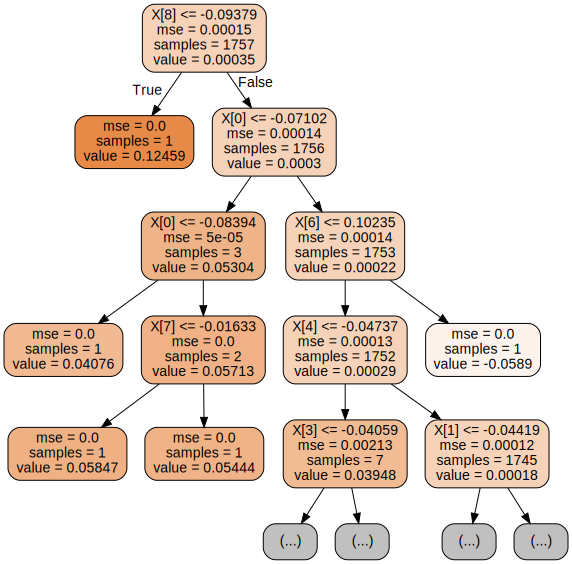

In [26]:
utils.tree_plot(reg.estimators_[2])

### Logistic Regression

In [5]:
ret_weekly = assets[target_name].resample('W-FRI').last().pct_change().dropna()

In [39]:
n_runs = 1000000
signals = (np.random.random((len(ret_weekly), n_runs)) > 0.5).astype(int)
signals[signals == 0] = -1

In [41]:
pd.DataFrame(signals * ret_weekly.to_numpy()[:, None]).mean().mean()

-2.119027520444323e-07

In [38]:
ret_weekly.mean()

0.0018407994198766588

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
data = load_iris(as_frame=True)
X = data.data
y = data.target
y = (y - 1).replace({-1: 0})
labels = y.replace({0: 'other', 1: 'virginica'}).rename('labels')
df = pd.concat([X, y, labels], axis=1).sample(frac=1).reset_index(drop=True)

In [16]:
n_samples = 0.8
n_features = 0.7
n_estimators = 10
reg = DecisionTreeRegressor()

X_train1, reg1
X_train2, reg2
...
X_train10, reg10

US_Equity_Fut_lag1  US_Equity_Fut_lag2  US_Equity_Fut_lag3  \
2004-02-02           -0.000221            0.000886           -0.011597   
2004-02-03            0.003982           -0.000221            0.000886   
2004-02-04           -0.001322            0.003982           -0.000221   
2004-02-05           -0.007944           -0.001322            0.003982   
2004-02-06            0.002224           -0.007944           -0.001322   
...                        ...                 ...                 ...   
2016-04-14            0.009850            0.010445           -0.003063   
2016-04-15            0.000241            0.009850            0.010445   
2016-04-18           -0.000722            0.000241            0.009850   
2016-04-19            0.005663           -0.000722            0.000241   
2016-04-20            0.003354            0.005663           -0.000722   

            US_Equity_Fut_lag4  US_Equity_Fut_lag5  US_Equity_Fut_lag6  \
2004-02-02           -0.010180            0.012278           -0.003278   
2004-02-03           -0.011597           -0.010180            0.012278   
2004-02-04            0.000886           -0.011597           -0.010180   
2004-02-05           -0.000221            0.000886           -0.011597   
2004-02-06            0.003982           -0.000221            0.000886   
...                        ...                 ...                 ...   
2016-04-14            0.002826           -0.012256            0.010546   
2016-04-15           -0.003063            0.002826           -0.012256   
2016-04-18            0.010445           -0.003063            0.002826   
2016-04-19            0.009850            0.010445           -0.003063   
2016-04-20            0.000241            0.009850            0.010445   

            US_Equity_Fut_lag7  US_Equity_Fut_lag8  US_Equity_Fut_lag9  \
2004-02-02           -0.001745            0.007473            0.001100   
2004-02-03           -0.003278           -0.001745            0.007473   
2004-02-04            0.012278           -0.003278           -0.001745   
2004-02-05           -0.010180            0.012278           -0.003278   
2004-02-06           -0.011597           -0.010180            0.012278   
...                        ...                 ...                 ...   
2016-04-14           -0.009113           -0.003632            0.006581   
2016-04-15            0.010546           -0.009113           -0.003632   
2016-04-18           -0.012256            0.010546           -0.009113   
2016-04-19            0.002826           -0.012256            0.010546   
2016-04-20           -0.003063            0.002826           -0.012256   

            US_Equity_Fut_lag10  US_Equity_Fut_lag11  US_Equity_Fut_lag12  \
2004-02-02            -0.001538             0.004191             0.001768   
2004-02-03             0.001100            -0.001538             0.004191   
2004-02-04             0.007473             0.001100            -0.001538   
2004-02-05            -0.001745             0.007473             0.001100   
2004-02-06            -0.003278            -0.001745             0.007473   
...                         ...                  ...                  ...   
2016-04-14            -0.001825             0.003785             0.009615   
2016-04-15             0.006581            -0.001825             0.003785   
2016-04-18            -0.003632             0.006581            -0.001825   
2016-04-19            -0.009113            -0.003632             0.006581   
2016-04-20             0.010546            -0.009113            -0.003632   

            US_Equity_Fut_lag13  US_Equity_Fut_lag14  US_Equity_Fut_lag15  \
2004-02-02             0.008919            -0.006204             0.007366   
2004-02-03             0.001768             0.008919            -0.006204   
2004-02-04             0.004191             0.001768             0.008919   
2004-02-05            -0.001538             0.004191             0.001768   
2004-02-06             0.001100    

In [ ]:
reg = LogisticRegression(penalty='l1', fit_intercept=False, solver='saga')
reg = LogisticRegression(penalty='none', fit_intercept=False)

In [ ]:
reg.fit(X, y)
reg.coef_.round(2)

## 1. Metrica (funzione di valutazione)
## 2. Campione OOS

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV()

### Trees

In [ ]:
classifiers = [ 
    DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    DecisionTreeClassifier(max_depth=5, criterion='entropy'),
    DecisionTreeClassifier(max_depth=10, criterion='entropy'),
    DecisionTreeClassifier(max_depth=3, criterion='gini'),
    DecisionTreeClassifier(max_depth=5, criterion='gini'),
    DecisionTreeClassifier(max_depth=10, criterion='gini')
]

In [13]:
X_train.to_numpy() @ X_train.to_numpy().T

array([[ 8.50577679e-04, -2.01093783e-04,  1.24259400e-05, ...,
        -1.70761587e-04, -2.16421439e-05, -1.80613539e-06],
       [-2.01093783e-04,  7.68052897e-04, -2.24071280e-04, ...,
        -4.22531011e-05, -1.73768971e-04, -7.06961260e-06],
       [ 1.24259400e-05, -2.24071280e-04,  7.66612251e-04, ...,
        -7.65139017e-05, -5.43413056e-05, -1.77985640e-04],
       ...,
       [-1.70761587e-04, -4.22531011e-05, -7.65139017e-05, ...,
         7.87186765e-04, -1.73977910e-04,  7.01912032e-05],
       [-2.16421439e-05, -1.73768971e-04, -5.43413056e-05, ...,
        -1.73977910e-04,  8.12613060e-04, -1.54667211e-04],
       [-1.80613539e-06, -7.06961260e-06, -1.77985640e-04, ...,
         7.01912032e-05, -1.54667211e-04,  8.23850743e-04]])

In [ ]:
data.target[data.data['petal width (cm)'] > 0.8]

In [ ]:
(data.target == 2).sum()

In [ ]:
1 - (1/2) **2 - (1/2) **2 

In [ ]:
clsf = DecisionTreeClassifier(max_depth=4).fit(data.data, data.target)
utils.tree_plot(clsf, max_depth=None, feature_names=data.feature_names)

In [ ]:
pd.concat([X_train, y_train], axis=1).to_clipboard()

In [ ]:
y_hat_left = y_train[X_train['US_Equity_Fut_lag11'] <= 0.13286].mean()

In [ ]:
X_train[:5]

In [ ]:
((y_train[X_train['US_Equity_Fut_lag11'] <= 0.13286] - y_hat_left) ** 2).mean()

In [ ]:
reg = DecisionTreeRegressor().fit(X_train, y_train)
utils.tree_plot(reg, feature_names=features.columns)

### Overfit

In [ ]:
reg = RandomForestRegressor().fit(features, target)

In [ ]:
y_pred = pd.Series(reg.predict(features), index=target.index, name='pred')

In [ ]:
pd.concat([target.cumsum(), y_pred.cumsum()], axis=1).plot()

In [ ]:
reg = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
y_pred_oos = pd.Series(reg.predict(X_test), index=y_test.index, name='pred_oos')

In [ ]:
pd.concat([y_test.cumsum(), y_pred_oos.cumsum()], axis=1).plot()

### PCA

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

rates = pd.read_csv(r'M:\BHAI\Shared\MacroBot\Scrap_Results\US_rate_curve.csv', parse_dates=True, index_col=0)
rates = rates.sort_index()
eps = 0.001
rates.loc[rates['6M'].between(-1.5 - eps, -1.5 + eps), '6M'] = np.nan
rates = rates.ffill()

In [8]:
rates[:5]

1M     2M     3M     6M     1Y     2Y     3Y     5Y     7Y  \
Dates                                                                       
2019-09-09  2.034  1.994  1.948  1.867  1.760  1.593  1.533  1.499  1.577   
2019-09-10  2.031  1.988  1.933  1.886  1.809  1.676  1.623  1.591  1.671   
2019-09-11  2.011  1.973  1.944  1.875  1.785  1.674  1.613  1.593  1.673   
2019-09-12  2.008  1.958  1.951  1.893  1.819  1.719  1.658  1.635  1.705   
2019-09-13  1.975  1.958  1.956  1.911  1.866  1.800  1.758  1.751  1.831   

              10Y    30Y  
Dates                     
2019-09-09  1.644  2.128  
2019-09-10  1.732  2.216  
2019-09-11  1.739  2.221  
2019-09-12  1.772  2.256  
2019-09-13  1.896  2.371

In [ ]:
X = pd.DataFrame(StandardScaler().fit_transform(rates), index=rates.index, columns=rates.columns)
pca = PCA(n_components=3).fit(X)
factors = pd.DataFrame(pca.transform(X), index=X.index)
weights = pd.DataFrame(pca.components_.T)

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 20))
factors.plot(ax=axs[0])
weights.plot(ax=axs[1])
rates.iloc[50].plot.line(ax=axs[2])
fig.tight_layout()
reconstruction = (factors @ weights.T).set_axis(X.columns + '_rec', axis=1)

In [ ]:
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

## Linear Regression with Neural Networks

In [188]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [189]:
train_df = pd.concat([X_train.iloc[:, :4], y_train], axis=1)[:30]
train_df.to_clipboard()                            
X, y = train_df.iloc[:, :-1], train_df.iloc[:, -1]

In [190]:
inputs = layers.Input(shape=4)
outputs = layers.Dense(1, activation='linear', use_bias=False)(inputs)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [191]:
model.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [192]:
initial_weights = pd.DataFrame(model.trainable_weights[0].numpy(), columns=['y'])
initial_weights.to_clipboard(index=False)
initial_weights

y
0  0.178652
1  0.875551
2 -0.067539
3  0.351728

In [193]:
y_pred = pd.DataFrame(model(X.to_numpy()).numpy(), columns=['predictions'])
y_pred.to_clipboard(index=False)
y_pred

predictions
0     -0.000488
1      0.006413
2     -0.000811
3      0.003876
4      0.005616
5     -0.002231
6      0.002070
7      0.008539
8     -0.012967
9     -0.004990
10    -0.002061
11    -0.003621
12     0.003577
13    -0.002924
14    -0.005068
15     0.004001
16     0.006928
17     0.001311
18     0.008215
19     0.008649
20    -0.003742
21     0.000298
22     0.002056
23     0.003935
24    -0.004405
25    -0.000676
26    -0.004619
27    -0.004122
28    -0.001298
29     0.002435

In [196]:
model.fit(X.to_numpy(), y.to_numpy(), epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.7847e-05
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7831e-05
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.7815e-05
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.7799e-05
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7783e-05
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7767e-05
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7751e-05
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7736e-05
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7720e-05
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 2.7704e-05
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.7689e-05
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.7673e-05
E

In [197]:
weights = pd.DataFrame(model.trainable_weights[0].numpy(), columns=['y'])
weights.to_clipboard(index=False)
weights

y
0  0.064838
1 -0.408624
2  0.223358
3 -0.109453

## Hidden Layer

In [198]:
inputs = layers.Input(shape=4)
hidden1 = layers.Dense(2, activation='sigmoid', use_bias=False)(inputs)
outputs = layers.Dense(1, activation='linear', use_bias=False)(hidden1)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 2         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [163]:
initial_weights = pd.DataFrame(model.trainable_weights[0].numpy(), columns=['a1', 'a2'])
initial_weights.to_clipboard(index=False)
initial_weights

a1        a2
0 -0.430485 -0.175893
1  0.191228  0.823224
2  0.744296  0.319580
3  0.193375 -0.637682

In [164]:
initial_weights = pd.DataFrame(model.trainable_weights[1].numpy(), columns=['y'])
initial_weights.to_clipboard(index=False)
initial_weights

y
0  0.754809
1  0.594582

In [170]:
y_pred = pd.DataFrame(model(X.to_numpy()).numpy(), columns=['predictions'])
y_pred.to_clipboard(index=False)
y_pred

y
0   0.676563
1   0.675337
2   0.675018
3   0.673534
4   0.676363
5   0.676111
6   0.672094
7   0.677220
8   0.676826
9   0.670134
10  0.673273
11  0.675075
12  0.675375
13  0.676100
14  0.672717
15  0.672440
16  0.677240
17  0.676484
18  0.673538
19  0.677238
20  0.676409
21  0.672458
22  0.673569
23  0.676991
24  0.675626
25  0.673188
26  0.674176
27  0.673946
28  0.673624
29  0.675242

In [175]:
model.fit(X.to_numpy(), y.to_numpy(), epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.1187e-05
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 3.1186e-05
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.1185e-05
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1184e-05
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1182e-05
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1181e-05
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1180e-05
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 3.1179e-05
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1177e-05
Epoch 10/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1176e-05
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 3.1175e-05
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 3.1174e-05
E

In [176]:
weights = pd.DataFrame(model.trainable_weights[0].numpy(), columns=['a1', 'a2'])
weights.to_clipboard(index=False)
weights

a1        a2
0 -1.046109 -0.684682
1 -2.353184  2.242060
2  1.757045 -1.817371
3 -0.754200 -0.816551

In [177]:
weights = pd.DataFrame(model.trainable_weights[1].numpy(), columns=['y'])
weights.to_clipboard(index=False)
weights

y
0  0.117531
1 -0.118126

In [178]:
y_pred = pd.DataFrame(model(X.to_numpy()).numpy(), columns=['predictions'])
y_pred.to_clipboard(index=False)
y_pred

predictions
0      0.000346
1     -0.000645
2      0.000344
3     -0.000679
4     -0.001178
5      0.000762
6     -0.000152
7     -0.002201
8      0.002488
9      0.000215
10    -0.001656
11    -0.000239
12    -0.000844
13     0.000384
14     0.000623
15    -0.001554
16    -0.001590
17     0.000726
18    -0.000680
19    -0.001378
20     0.001359
21    -0.000068
22    -0.001129
23    -0.001054
24     0.001137
25    -0.000259
26    -0.000225
27    -0.000168
28    -0.000512
29    -0.000980